In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import Ridge

# Import the train data

In [6]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

# Setup Pipeline

In [7]:
poly = PolynomialFeatures()
pca=PCA()
SLR = Ridge()

In [8]:
# Step 1: Polynomial transform
# Step 2: PCA
# Step 3: Model
pipe = Pipeline(steps=[("poly",poly),("pca",pca),("SLR",SLR)])

In [9]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "poly__degree":[1,2],
    "SLR__alpha":[0.05,0.1,0.2,0.5,1,2,8,10,100,1000,10000]
}

# Setup GridSearch

In [10]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [11]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('pca', PCA()), ('SLR', Ridge())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.05, 0.1, 0.2, 0.5, 1, 2, 8, 10, 100,
                                        1000, 10000],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [12]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.734):
{'SLR__alpha': 1000, 'pca__n_components': 150, 'poly__degree': 1}


In [13]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,param_poly__degree,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
158,0.130899,0.018532,0.012240,0.008877,1000,170,1,"{'SLR__alpha': 1000, 'pca__n_components': 170,...",-0.652320,-0.629464,...,-0.796638,-0.838327,-0.623856,-0.605852,-0.705903,-0.751369,-0.717822,-0.734125,0.119974,1
156,0.124455,0.018127,0.015599,0.001630,1000,150,1,"{'SLR__alpha': 1000, 'pca__n_components': 150,...",-0.652320,-0.629464,...,-0.796638,-0.838327,-0.623856,-0.605852,-0.705903,-0.751369,-0.717822,-0.734125,0.119974,1
142,0.120352,0.014434,0.016658,0.003265,100,170,1,"{'SLR__alpha': 100, 'pca__n_components': 170, ...",-0.557192,-0.551972,...,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,3
140,0.130748,0.018606,0.016717,0.012615,100,150,1,"{'SLR__alpha': 100, 'pca__n_components': 150, ...",-0.557192,-0.551972,...,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,3
110,0.122507,0.018303,0.014059,0.017742,8,170,1,"{'SLR__alpha': 8, 'pca__n_components': 170, 'p...",-0.513021,-0.547673,...,-0.619544,-0.686219,-0.546546,-0.564497,-0.565643,-0.640100,-0.603677,-0.756829,0.510501,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5.804003,0.119270,0.142332,0.017611,10,10,2,"{'SLR__alpha': 10, 'pca__n_components': 10, 'p...",-1.330983,-1.278905,...,-1.682971,-1.610604,-1.134297,-1.393741,-1.348533,-1.382236,-1.426908,-1.396511,0.147864,172
83,5.881019,0.117326,0.131565,0.025002,2,10,2,"{'SLR__alpha': 2, 'pca__n_components': 10, 'po...",-1.330981,-1.278905,...,-1.682970,-1.610606,-1.134300,-1.393741,-1.348533,-1.382236,-1.426908,-1.396511,0.147864,173
35,5.910932,0.136019,0.140270,0.009898,0.2,10,2,"{'SLR__alpha': 0.2, 'pca__n_components': 10, '...",-1.330979,-1.278905,...,-1.682971,-1.610608,-1.134299,-1.393741,-1.348534,-1.382236,-1.426908,-1.396511,0.147864,174
19,6.006221,0.280403,0.164173,0.029886,0.1,10,2,"{'SLR__alpha': 0.1, 'pca__n_components': 10, '...",-1.330983,-1.278905,...,-1.682970,-1.610602,-1.134299,-1.393741,-1.348536,-1.382237,-1.426908,-1.396511,0.147863,175


# Best Hyperparameter

In [14]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 1000, 'pca__n_components': 170, 'poly__degree': 1}


# # Evaluate Model $log(Sales)$

In [17]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_degree=parms.iloc[0][0]['poly__degree']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [18]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)

In [19]:
poly1 = PolynomialFeatures(degree=best_degree)

In [20]:
pca1 = PCA(n_components=100)
X_train1 = poly1.fit_transform(X_train1)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Ridge(alpha=best_alpha)
SLR1.fit(PX_train1,Y_train1)

Ridge(alpha=1000)

In [21]:
pca2 = PCA(n_components=100)
X_test1=poly1.fit_transform(X_test1)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [22]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.854478458987948

In [23]:
result = pd.DataFrame(np.exp(Y_test1))

In [24]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [25]:
MSE(result["sales"],result["Predicted_sales"])

1096.6516365373598

# Inventory Decision

In [26]:
residue = result['sales']-result['Predicted_sales']

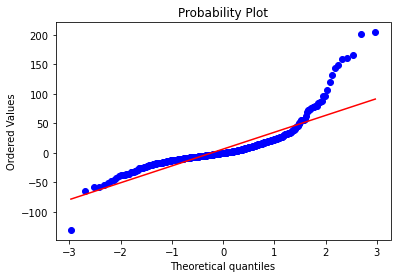

In [27]:
import scipy
scipy.stats.probplot(residue, dist="norm", plot=plt)
plt.show()

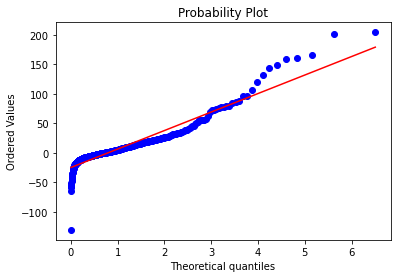

In [28]:
scipy.stats.probplot(residue, dist="expon", plot=plt)
plt.show()

In [29]:
import scipy.stats as sct

In [30]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

In [31]:
s = residue.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

In [32]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

# Out-of-samples Profit

In [33]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [34]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [35]:
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

24668.0

In [36]:
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

24404.0